<a href="https://colab.research.google.com/github/tangani/Blue-Book-for-Bulldozers/blob/main/Blue_Book_for_Bulldozers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Blue Book for Bulldozers

## Import libraries and data

In [ ]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# preprocessor
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Models from Scikit-Learn
from sklearn.ensemble import RandomForestRegressor

# Model Evaluations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error,mean_squared_log_error,mean_absolute_error,make_scorer

#Pipeline
from sklearn.pipeline import Pipeline
plt.style.use('seaborn-whitegrid')
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/data_science/bluebook-for-bulldozers/TrainAndValid.csv', low_memory=False, parse_dates=['saledate'])
train_data.sort_values(by='saledate',inplace=True)
train_data.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/data_science/bluebook-for-bulldozers/Test.csv', low_memory=False, parse_dates=['saledate'])
test_data.sort_values(by='saledate',inplace=True)
test_data.head().T

,1408,1023,1728,1167,1594
SalesID,4317459,4249784,4392603,4274831,4362801
MachineID,2295526,1745722,2283116,2288988,2300591
ModelID,8132,3178,18111,3783,16490
datasource,172,172,172,172,172
auctioneerID,1,1,1,1,1
YearMade,1998,1995,2004,2001,2006
MachineHoursCurrentMeter,4359,4489,2126,9115,885
UsageBand,Medium,Low,Low,Medium,Low
saledate,2012-05-01 00:00:00,2012-05-01 00:00:00,2012-05-01 00:00:00,2012-05-01 00:00:00,2012-05-01 00:00:00
fiModelDesc,4475,580SUPER L,BL70,928G,PC18MR-2


## Exploratory data analysis

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401125 entries, 205615 to 400217
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   401125 non-null  int64         
 1   SalePrice                 401125 non-null  int64         
 2   MachineID                 401125 non-null  int64         
 3   ModelID                   401125 non-null  int64         
 4   datasource                401125 non-null  int64         
 5   auctioneerID              380989 non-null  float64       
 6   YearMade                  401125 non-null  int64         
 7   MachineHoursCurrentMeter  142765 non-null  float64       
 8   UsageBand                 69639 non-null   object        
 9   saledate                  401125 non-null  datetime64[ns]
 10  fiModelDesc               401125 non-null  object        
 11  fiBaseModel               401125 non-null  object        
 1

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12457 entries, 1408 to 9803
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries   

In [ ]:
# train_data.isna().sum() / len(train_data) * 100
train_data.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
UsageBand                   331486
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             137191
fiModelSeries               344217
fiModelDescriptor           329206
ProductSize                 210775
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                296764
Enclosure                      325
Forks                       209048
Pad_Type                    321991
Ride_Control                252519
Stick                       321991
Transmission                217895
Turbocharged                321991
Blade_Extension     

>There are too many null series with null values which are however of paramount importance, forexampletypes of vehicles. It data engineering is of paramount importance

In [ ]:
test_data.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

### Visualizing missing data

In [ ]:
# visualizing missing entries
train_df_missing_percentage = ((train_data.isna().sum()/train_data.shape[0])*100)
test_df_missing_percentage = ((train_data.isna().sum()/train_data.shape[0])*100)

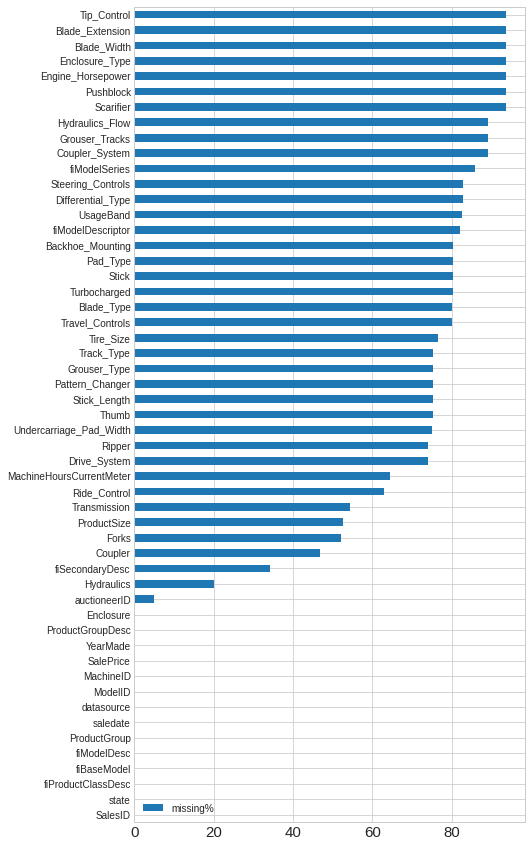

In [ ]:
pd.DataFrame(train_df_missing_percentage,columns=['missing%']).sort_values(by='missing%').plot(kind='barh',figsize=(7,15));
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 10);

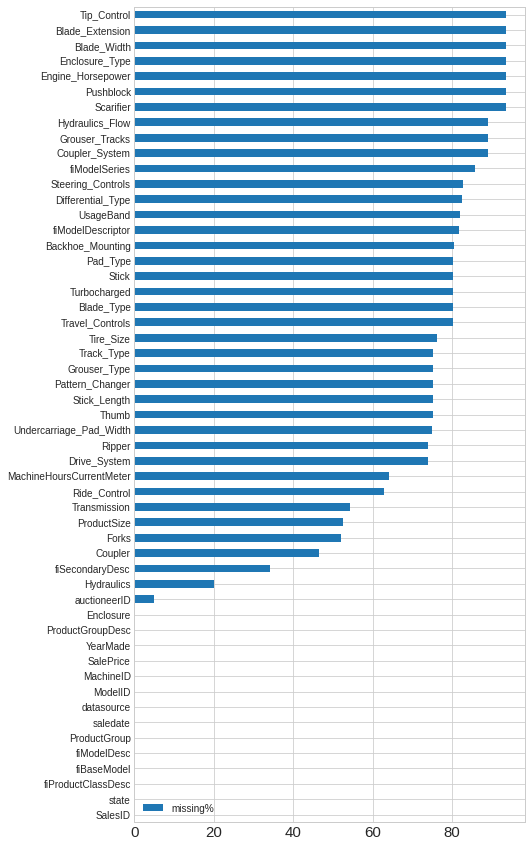

In [ ]:
pd.DataFrame(test_df_missing_percentage,columns=['missing%']).sort_values(by='missing%').plot(kind='barh',figsize=(7,15));
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 10);

## Data Cleaning and Feature Engineering

In [ ]:
data_eda = train_data.copy()

data_eda['saleYear'] = data_eda.saledate.dt.year
data_eda['saleMonth'] = data_eda.saledate.dt.month
data_eda['saleDay'] = data_eda.saledate.dt.day
data_eda['saleDayofWeek'] = data_eda.saledate.dt.dayofweek
data_eda['saleDayofYear'] = data_eda.saledate.dt.dayofyear

# data_eda.drop('saledate', axis=1, inplace=True)

In [ ]:
# Converting all columns with object dtype to category dtype
for label,content in data_eda.items() :
    if pd.api.types.is_object_dtype(content):
        data_eda[label] = content.astype('category')

In [ ]:
cat=[] # list for storing all columns with 'cstegory' dtype
cat_missing = [] # list for storing columns with 'category' dtype and having missing values
num_missing = [] # list for storing columns with 'numerical' dtype and having missing values

In [ ]:
for label,content in data_eda.items():
    
    if pd.api.types.is_numeric_dtype(content): # checking for numerical features
        if content.isna().sum() > 0: # checking if the feature has any missing values
            data_eda[f'{label}_ismissing'] = content.isna()
            num_missing.append(label)
            
    if pd.api.types.is_categorical_dtype(content): # checking for categorical features
        cat.append(label) 
        if content.isna().sum() > 0: # checking if the feature has any missing values
            data_eda[f'{label}_ismissing'] = content.isna()
            cat_missing.append(label)
            
cat_not_missing = list(set(cat) - set(cat_missing))

### Filling categorical values

In [ ]:
# For missing values in categorical datatype, by default `-1` is assigned for its code, so adding 1 before creating new column
data_eda[cat_missing] = data_eda[cat_missing].apply(lambda i : i.cat.codes+1)

# For features with no missing values, simply assigning code
data_eda[cat_not_missing] = data_eda[cat_not_missing].apply(lambda i : i.cat.codes)

In [ ]:
data_eda.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,...,auctioneerID_ismissing,MachineHoursCurrentMeter_ismissing,UsageBand_ismissing,fiSecondaryDesc_ismissing,fiModelSeries_ismissing,fiModelDescriptor_ismissing,ProductSize_ismissing,Drive_System_ismissing,Enclosure_ismissing,Forks_ismissing,Pad_Type_ismissing,Ride_Control_ismissing,Stick_ismissing,Transmission_ismissing,Turbocharged_ismissing,Blade_Extension_ismissing,Blade_Width_ismissing,Enclosure_Type_ismissing,Engine_Horsepower_ismissing,Hydraulics_ismissing,Pushblock_ismissing,Ripper_ismissing,Scarifier_ismissing,Tip_Control_ismissing,Tire_Size_ismissing,Coupler_ismissing,Coupler_System_ismissing,Grouser_Tracks_ismissing,Hydraulics_Flow_ismissing,Track_Type_ismissing,Undercarriage_Pad_Width_ismissing,Stick_Length_ismissing,Thumb_ismissing,Pattern_Changer_ismissing,Grouser_Type_ismissing,Backhoe_Mounting_ismissing,Blade_Type_ismissing,Travel_Controls_ismissing,Differential_Type_ismissing,Steering_Controls_ismissing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,0,1989-01-17,4592,1743,0,0,0,4,46,43,4,4,0,6,0,0,0,0,3,0,0,0,0,0,1,0,2,0,0,0,0,0,...,False,True,True,True,True,True,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,0,1989-01-31,1819,558,0,0,0,0,59,8,5,5,0,6,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,...,False,True,True,True,True,True,True,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,0,1989-01-31,2347,712,59,0,0,2,49,8,4,4,0,6,0,0,0,0,8,0,0,0,0,0,1,0,2,0,0,0,0,0,...,False,True,True,False,True,True,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,0,1989-01-31,1818,557,0,0,0,0,73,8,5,5,0,1,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,...,False,True,True,True,True,True,True,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,0,1989-01-31,2118,682,21,0,0,0,50,8,4,4,0,6,0,0,0,0,8,0,0,0,0,0,1,0,2,0,0,0,0,0,...,False,True,True,False,True,True,True,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True


In [ ]:
(data_eda.isna().sum() !=0 ).sum()

2

### Filling numerical values

In [ ]:
train_df = data_eda.loc[data_eda.saledate.dt.year < 2012, :].drop('saledate', axis=1)

valid_df = data_eda.loc[data_eda.saledate <= pd.Timestamp(
    year=2012, month=4, day=30)].loc[data_eda.saledate >= pd.Timestamp(year=2012, month=1, day=1)].drop('saledate', axis=1)


In [ ]:
train_df.shape

(401125, 97)

In [ ]:
valid_df.shape

(11573, 97)

In [ ]:
test_df.shape

NameError: ignored